In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
%ls

 Volume in drive D is D
 Volume Serial Number is 02D3-2159

 Directory of D:\Notas de Estudio\Proyectos\production_analysis__project\production_analysis\data\processed

02/06/2022  11:11 PM    <DIR>          .
02/06/2022  11:11 PM    <DIR>          ..
01/20/2022  06:23 PM                 0 .gitkeep
01/01/2022  12:05 PM    <DIR>          .ipynb_checkpoints
02/06/2022  11:11 PM                76 common list.txt
02/06/2022  11:11 PM           330,645 data.csv
02/06/2022  11:11 PM               648 machines_days_of_work.csv
02/06/2022  11:11 PM           103,984 scrap per machine.png
02/06/2022  11:11 PM            17,782 scrap_vs_production.pdf
02/06/2022  11:11 PM            16,711 scrap_vs_total_scrap.pdf
02/06/2022  11:11 PM            30,340 tendency_scrap_vs_production.pdf
02/06/2022  11:11 PM            30,486 tendency_scrap_vs_total_scrap.pdf
               9 File(s)        530,672 bytes
               3 Dir(s)  223,127,322,624 bytes free


In [16]:
%cd D:\Notas de Estudio\Proyectos\production_analysis__project\production_analysis\data\processed

D:\Notas de Estudio\Proyectos\production_analysis__project\production_analysis\data\processed


In [17]:
%ls

 Volume in drive D is D
 Volume Serial Number is 02D3-2159

 Directory of D:\Notas de Estudio\Proyectos\production_analysis__project\production_analysis\data\processed

02/06/2022  11:11 PM    <DIR>          .
02/06/2022  11:11 PM    <DIR>          ..
01/20/2022  06:23 PM                 0 .gitkeep
01/01/2022  12:05 PM    <DIR>          .ipynb_checkpoints
02/06/2022  11:11 PM                76 common list.txt
02/06/2022  11:11 PM           330,645 data.csv
02/06/2022  11:11 PM               648 machines_days_of_work.csv
02/06/2022  11:11 PM           103,984 scrap per machine.png
02/06/2022  11:11 PM            17,782 scrap_vs_production.pdf
02/06/2022  11:11 PM            16,711 scrap_vs_total_scrap.pdf
02/06/2022  11:11 PM            30,340 tendency_scrap_vs_production.pdf
02/06/2022  11:11 PM            30,486 tendency_scrap_vs_total_scrap.pdf
               9 File(s)        530,672 bytes
               3 Dir(s)  223,127,322,624 bytes free


In [18]:
data = pd.read_csv("data.csv")
data.head(5)

,FECHA,TURNO,GRUPO,MÁQ.,CODIGO,PRODUCCION (PZAS),TOTAL KG,SCRAP,DIA,NOMBRE_DIA
0,2022-01-03,Mañana,A,EB G1,0,0,0.0,0.0,3,Monday
1,2022-01-03,Mañana,A,EB G2,0,0,0.0,0.0,3,Monday
2,2022-01-03,Mañana,A,EB G3,0,0,0.0,0.0,3,Monday
3,2022-01-03,Mañana,A,EB G4,0,0,0.0,0.0,3,Monday
4,2022-01-03,Mañana,A,EB-17,0,0,0.0,0.0,3,Monday


In [19]:
data.drop(['FECHA', 'TURNO', 'GRUPO', 'CODIGO', 'PRODUCCION (PZAS)', 'DIA', 'NOMBRE_DIA'], inplace = True, axis = 1)
data.head(5)

,MÁQ.,TOTAL KG,SCRAP
0,EB G1,0.0,0.0
1,EB G2,0.0,0.0
2,EB G3,0.0,0.0
3,EB G4,0.0,0.0
4,EB-17,0.0,0.0


In [20]:
data = data.groupby('MÁQ.').sum()
data.head(5)

,TOTAL KG,SCRAP
MÁQ.,,
EB 120,27474.398,2207.90
EB 121,196686.935,4667.20
EB G1,8089.308,608.15
EB G2,16388.185,1485.21
EB G3,9600.724,1062.65


In [21]:
len(data.index.values)

62

In [22]:
data['PORCENTAJE'] = data['SCRAP']/(data['SCRAP']+data['TOTAL KG'])*100
data.head(5)

,TOTAL KG,SCRAP,PORCENTAJE
MÁQ.,,,
EB 120,27474.398,2207.90,7.438440
EB 121,196686.935,4667.20,2.317906
EB G1,8089.308,608.15,6.992273
EB G2,16388.185,1485.21,8.309613
EB G3,9600.724,1062.65,9.965420


In [23]:
data.sort_values(by = 'PORCENTAJE', ascending = True) # just to check if there is a strange value


,TOTAL KG,SCRAP,PORCENTAJE
MÁQ.,,,
EB-105,4138.907,87.89,2.079352
EB-17,59381.760,1359.25,2.237780
EB 121,196686.935,4667.20,2.317906
EB-050,5724.954,151.70,2.581401
EB-036,5697.268,177.45,3.020571
...,...,...,...
EB-112,0.000,0.00,NaN
EB-114,0.000,0.00,NaN
EB-115,0.000,0.00,NaN


In [24]:
#removing machines with scrap = 0

data = data.loc[data['SCRAP']>0]
data.sort_values(by = 'PORCENTAJE', ascending = True, inplace = True)
data

,TOTAL KG,SCRAP,PORCENTAJE
MÁQ.,,,
EB-105,4138.907,87.890,2.079352
EB-17,59381.760,1359.250,2.237780
EB 121,196686.935,4667.200,2.317906
EB-050,5724.954,151.700,2.581401
EB-036,5697.268,177.450,3.020571
EB-053,23369.965,776.550,3.215992
EB-124,117087.960,4223.000,3.481136
EB-051,5797.150,224.300,3.725016
EB-102,4080.531,159.170,3.754274


In [25]:
len(data.index.values)

36

In [26]:
machines = data.index.values
machines

array(['EB-105', 'EB-17', 'EB 121', 'EB-050', 'EB-036', 'EB-053',
       'EB-124', 'EB-051', 'EB-102', 'EB-052', 'EB-118', 'EB-091',
       'EB-032', 'EB-117', 'EB-090', 'EB-119', 'EB-106', 'EB-123',
       'EB-074', 'EB-092', 'EB-108', 'EB G1', 'EB-125', 'EB-107',
       'EB 120', 'EB-122', 'EB-099', 'EB G2', 'EB-101', 'EB-103', 'EB G3',
       'EB-075', 'EB G4', 'EB-104', 'EB-029', 'EB-070'], dtype=object)

In [27]:
#number of charts
n = 1
mac = len(machines)
while mac>15:
    mac = mac -15
    n=n+1
print(n)
    

3


In [28]:
machines[0:15]

array(['EB-105', 'EB-17', 'EB 121', 'EB-050', 'EB-036', 'EB-053',
       'EB-124', 'EB-051', 'EB-102', 'EB-052', 'EB-118', 'EB-091',
       'EB-032', 'EB-117', 'EB-090'], dtype=object)

In [29]:
data["PORCENTAJE"].iloc[0:15]

MÁQ.
EB-105    2.079352
EB-17     2.237780
EB 121    2.317906
EB-050    2.581401
EB-036    3.020571
EB-053    3.215992
EB-124    3.481136
EB-051    3.725016
EB-102    3.754274
EB-052    4.041354
EB-118    4.151069
EB-091    4.302882
EB-032    4.347406
EB-117    4.956599
EB-090    5.189939
Name: PORCENTAJE, dtype: float64

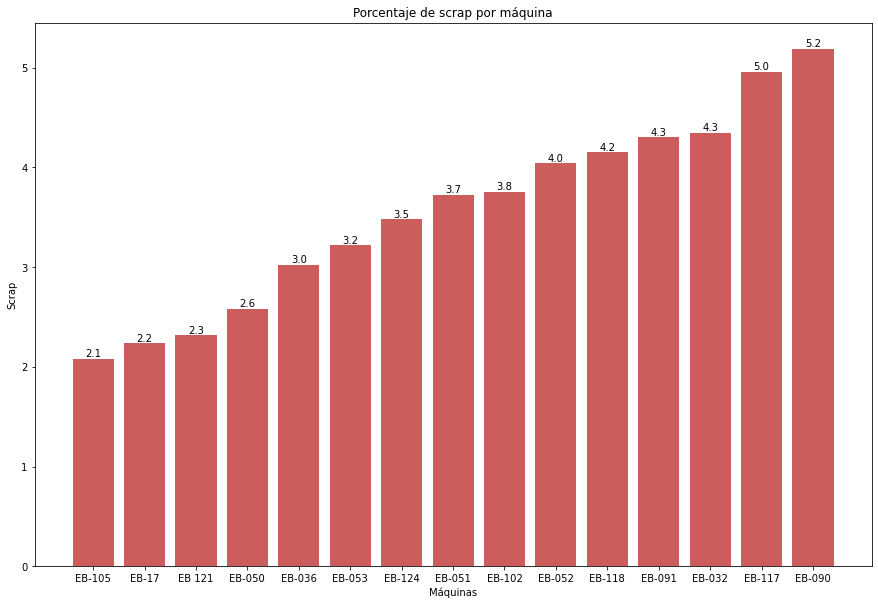

In [32]:
#Example of one chart
fig, axs = plt.subplots(figsize = [15,10] )
x = machines[0:15]
y = data["PORCENTAJE"].iloc[0:15]
bars = axs.bar(x, y, color = 'indianred', alpha = 1 ,linewidth = 0.2)
axs.set_xlabel('Máquinas')
axs.set_ylabel('Scrap')
axs.set_title('Porcentaje de scrap por máquina')
axs.bar_label(bars, label_type = "edge", fmt='%0.1f')
#plt.show()
plt.savefig('scrap per machine_b')

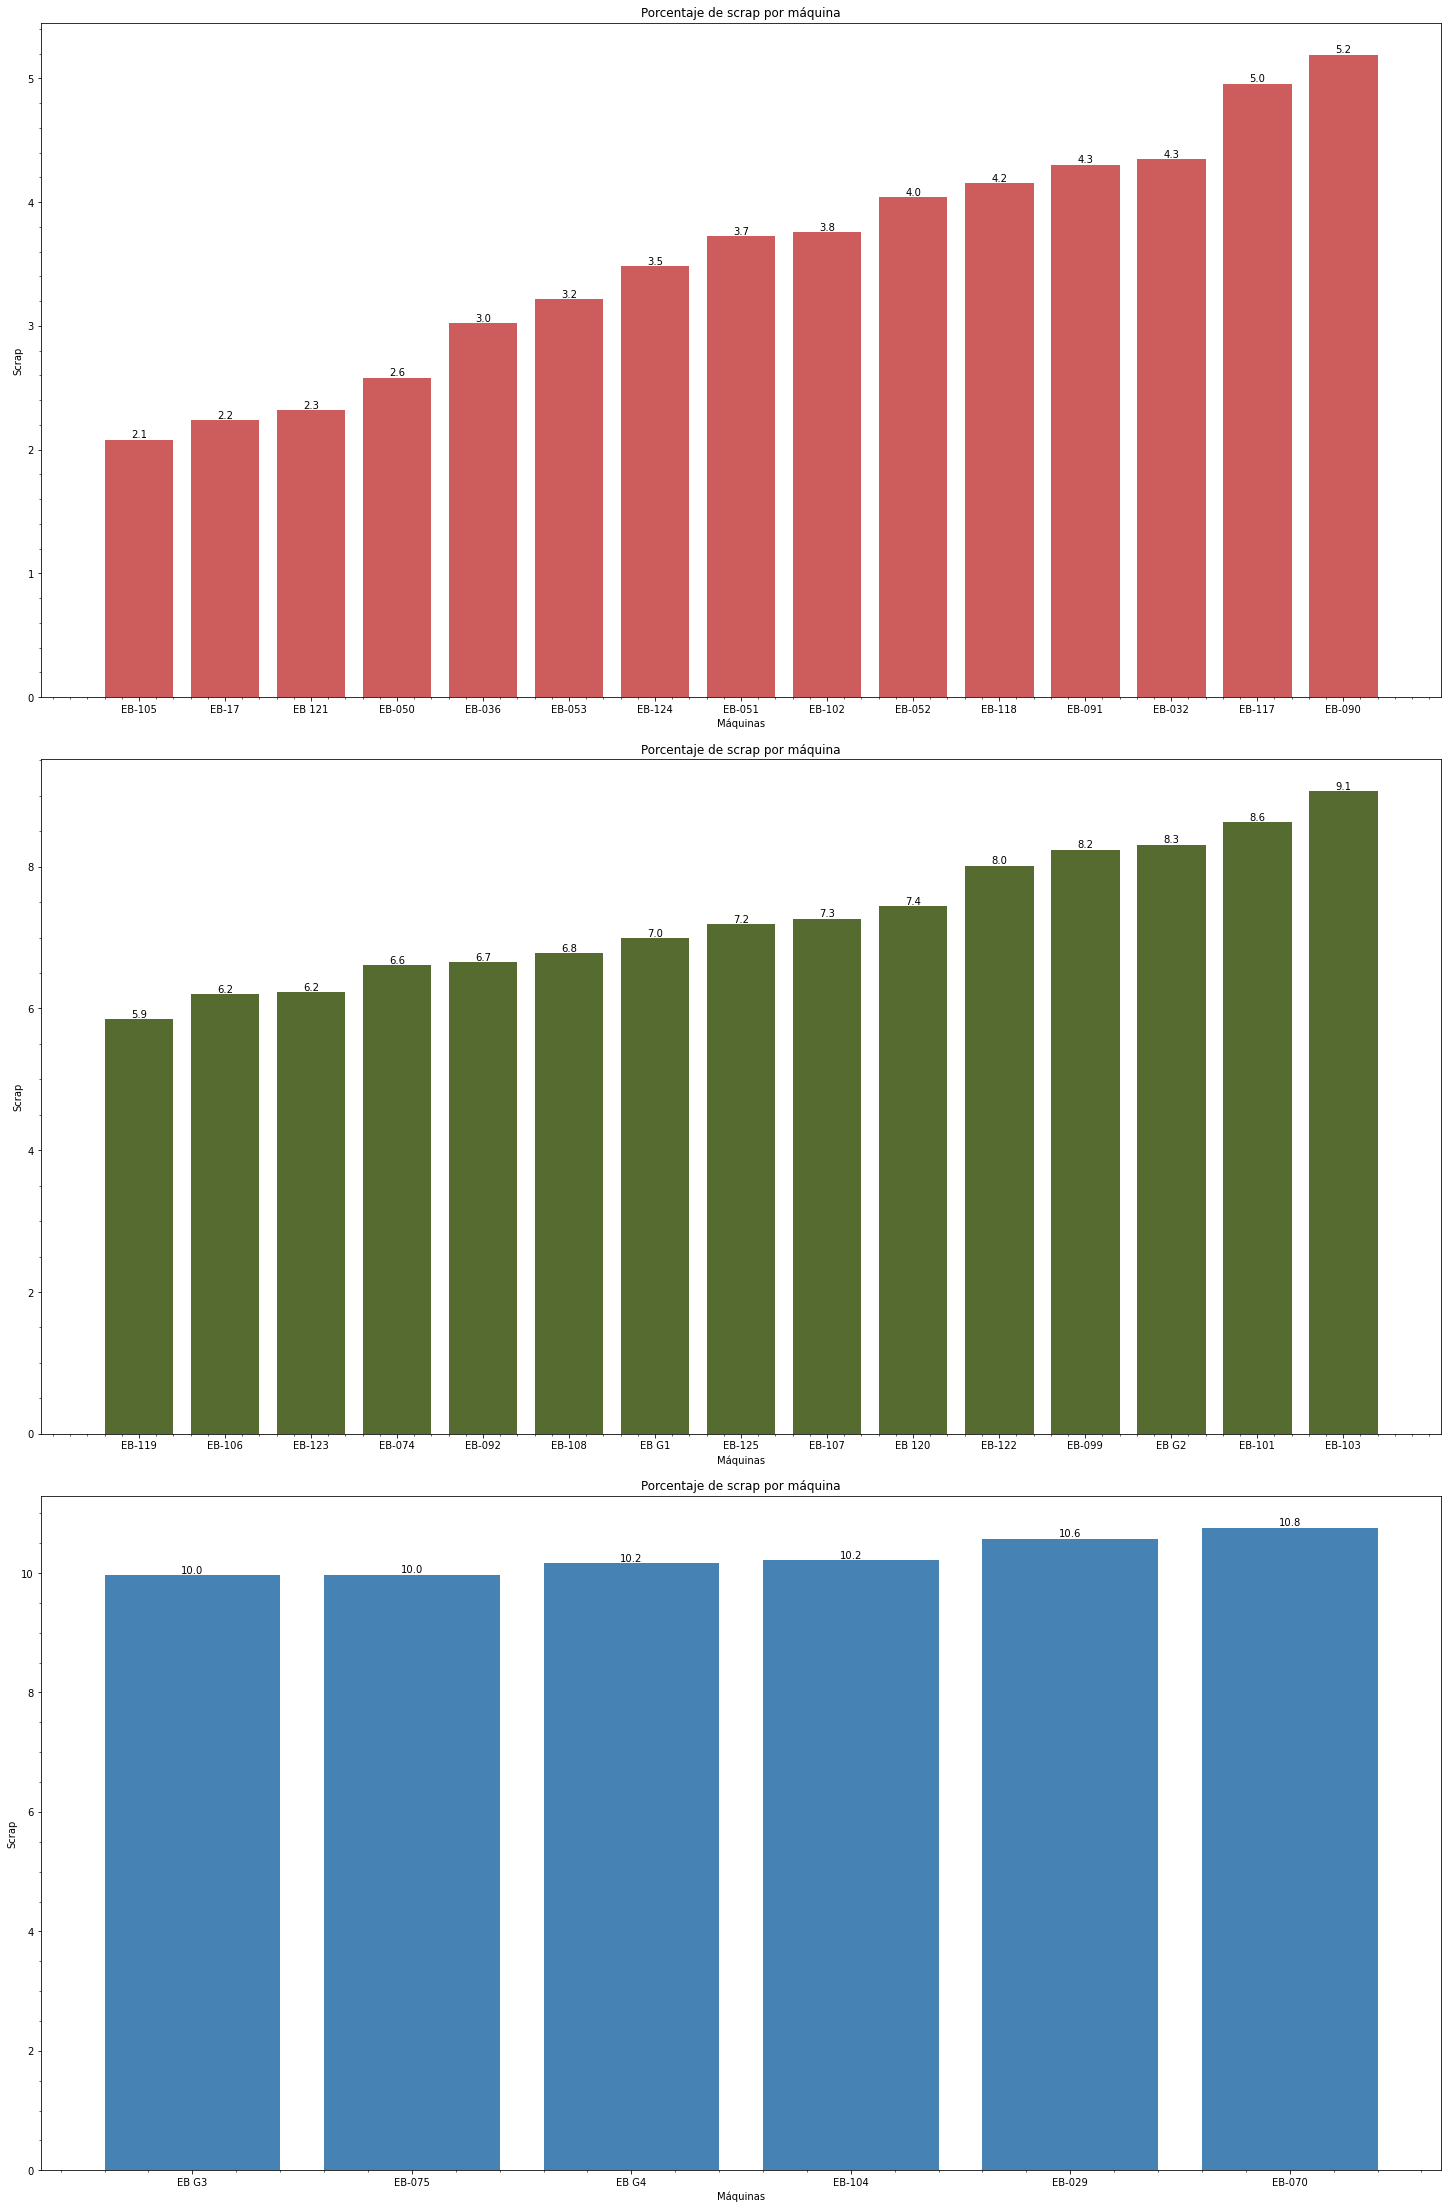

In [31]:
color = ['indianred', 'darkolivegreen','steelblue', 'saddlebrown']
fig = plt.subplots(figsize = [20,40],constrained_layout=True)

initial_value = 0 
last_value = 15
for i in range(n):
    plt.subplot(4,1,i+1)
    x = machines[initial_value:last_value]
    y = data["PORCENTAJE"].iloc[initial_value:last_value]
    bars = plt.bar(x, y, color = color[i], alpha = 1, linewidth = 0.2)
    plt.xlabel('Máquinas')
    plt.ylabel('Scrap')
    plt.title('Porcentaje de scrap por máquina')
    plt.bar_label(bars, label_type = "edge", fmt='%0.1f')
    plt.minorticks_on()
 
    
 
    initial_value = initial_value + 15
    last_value = last_value +15

        
#plt.show()
plt.savefig('scrap per machine')
    

* Creating one graph per group

In [33]:
machine_number = len(data.index.values)
print(machine_number)

36


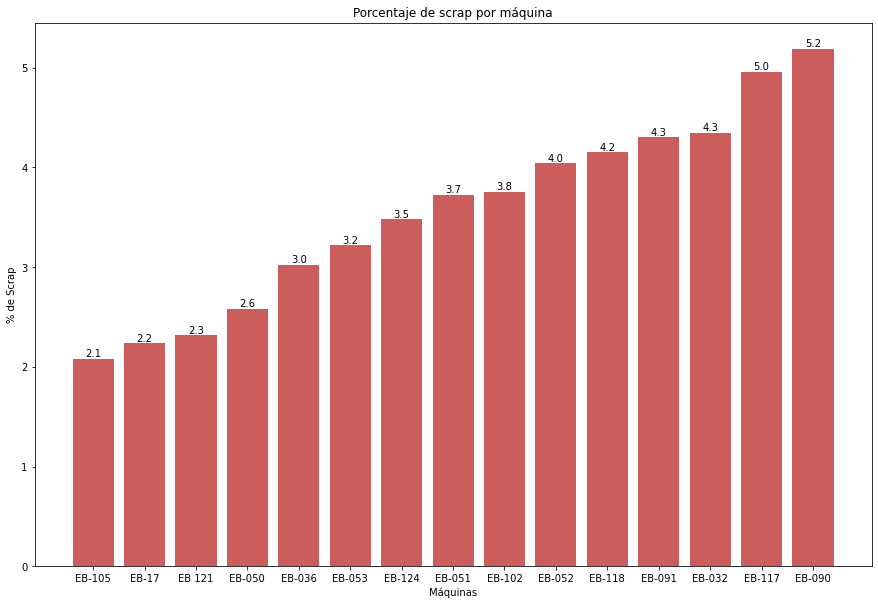

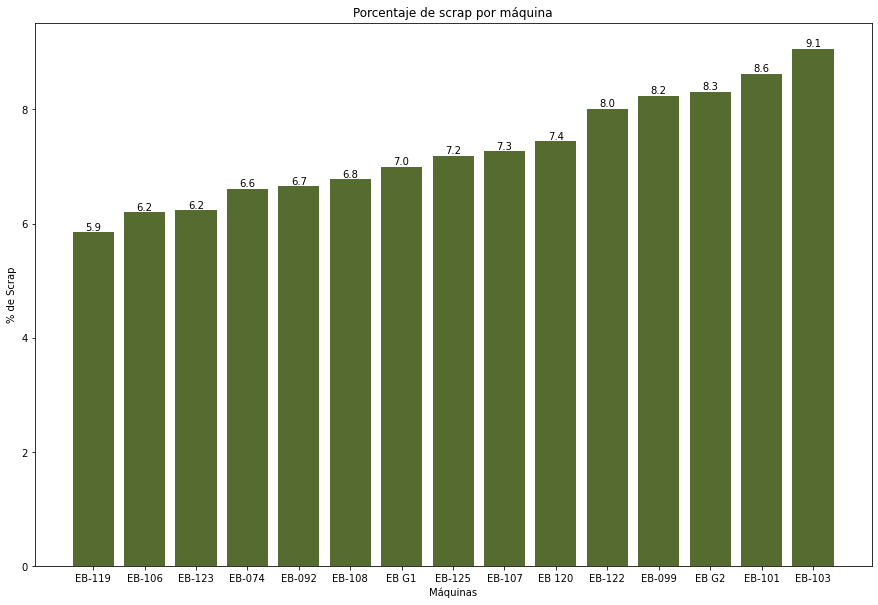

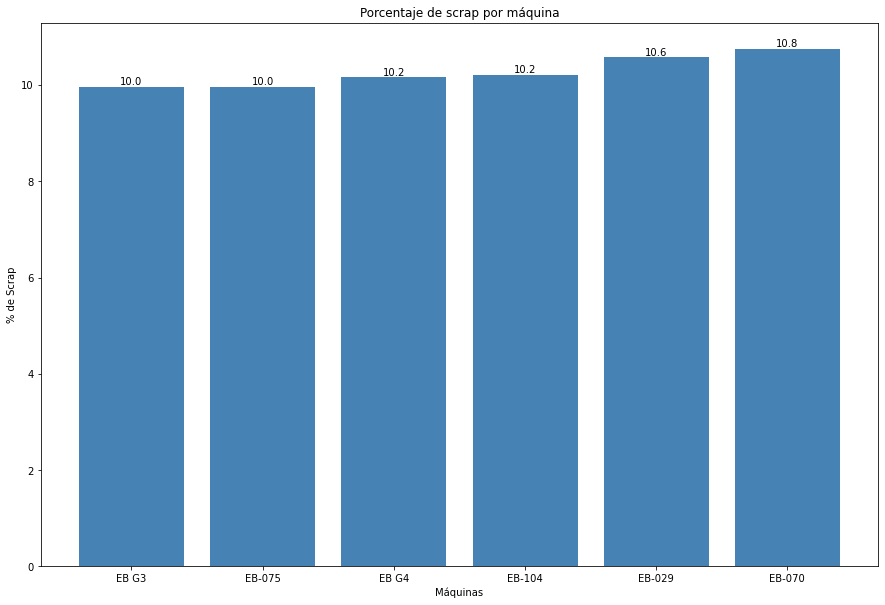

In [39]:
color = ['indianred', 'darkolivegreen','steelblue', 'saddlebrown']
init_list = [0,15,30,45]
for i in range(1,5): # 1 to 4
    target = 15 * i 
    if init_list[i-1] < machine_number:
        fig, axs = plt.subplots(figsize = [15,10] )
        x = machines[init_list[i-1]:target]
        y = data["PORCENTAJE"].iloc[init_list[i-1]:target]
        bars = axs.bar(x, y, color = color[i-1], alpha = 1 ,linewidth = 0.2)
        axs.set_xlabel('Máquinas')
        axs.set_ylabel('% de Scrap')
        axs.set_title('Porcentaje de scrap por máquina')
        axs.bar_label(bars, label_type = "edge", fmt='%0.1f')
        plt.savefig('scrap per machine_'+str(init_list[i-1]))
    else:
        continue